In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [3]:
def display(i):
    image = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r)

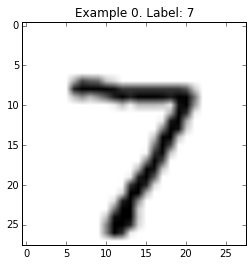

In [4]:
display(0)

In [5]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(n_classes=10, feature_columns=feature_columns)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'joint_weights': False, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000002B6B95F02B0>, 'optimizer': None, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'gradient_clip_norm': None})

In [6]:
print(classifier.evaluate(test_data, test_labels)['accuracy'])

0.9216


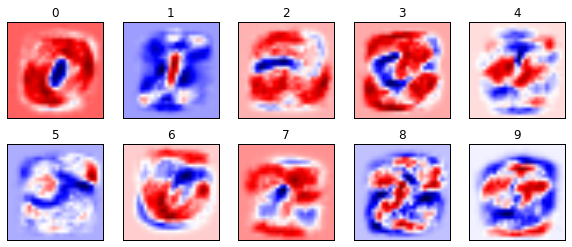

In [7]:
# visualizing learned weights

wt_names = classifier.get_variable_names()

weights = classifier.get_variable_value(classifier.get_variable_names()[1]) 
f, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # no ticks
    a.set_yticks(())
plt.show()

In [68]:
weights

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)